In [267]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

#Importing tools and libraries needed 

In [268]:
pl_one_data = pd.read_csv('nbadatasets/allen.csv')
pl_two_data = pd.read_csv('nbadatasets/billups.csv')
pl_three_data = pd.read_csv('nbadatasets/bryant.csv')
pl_four_data = pd.read_csv('nbadatasets/carter.csv')
pl_five_data = pd.read_csv('nbadatasets/duncan.csv')
pl_six_data = pd.read_csv('nbadatasets/garnett.csv')
pl_seven_data = pd.read_csv('nbadatasets/iverson.csv')
pl_eight_data = pd.read_csv('nbadatasets/kidd.csv')
pl_nine_data = pd.read_csv('nbadatasets/marion.csv')
pl_ten_data = pd.read_csv('nbadatasets/mcgrady.csv')
pl_eleven_data = pd.read_csv('nbadatasets/nash.csv')
pl_twelve_data = pd.read_csv('nbadatasets/nowitski.csv')
pl_thirteen_data = pd.read_csv('nbadatasets/oneal.csv')
pl_fourteen_data = pd.read_csv('nbadatasets/pierce.csv')
pl_fifteen_data = pd.read_csv('nbadatasets/stojakovic.csv')

#Reading each of the fifteen csv files in as separate variables
#Each file contains data for each of the fifteen players in our population

In [269]:
pl_eight_data.head()

#Printing the first five lines of one of the data sets to see what our table looks like
#Also making note of the titles of our columns of interest for later use

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2000-01,27,PHO,NBA,PG,77,76,3065,5.3,12.9,...,0.814,1.1,4.7,5.8,8.8,1.9,0.3,3.4,2.0,15.3
1,2001-02,28,NJN,NBA,PG,82,82,3056,5.2,13.4,...,0.814,1.5,5.5,7.0,9.5,2.1,0.2,3.4,1.6,14.2
2,2002-03,29,NJN,NBA,PG,80,80,2989,6.2,15.0,...,0.841,1.3,4.7,6.1,8.6,2.2,0.3,3.6,1.5,18.0
3,2003-04,30,NJN,NBA,PG,67,66,2450,5.4,14.1,...,0.827,1.2,5.0,6.3,9.1,1.8,0.2,3.1,1.6,15.2
4,2004-05,31,NJN,NBA,PG,66,65,2435,5.0,12.6,...,0.740,1.4,5.8,7.2,8.1,1.8,0.1,2.5,1.6,14.1


In [270]:
allen = pl_one_data[['Age', 'PTS', 'TRB', 'AST', 'FG%']]
billups = pl_two_data[['Age', 'PTS', 'TRB', 'AST', 'FG%']]
bryant = pl_three_data[['Age', 'PTS', 'TRB', 'AST', 'FG%']]
carter = pl_four_data[['Age', 'PTS', 'TRB', 'AST', 'FG%']]
duncan = pl_five_data[['Age', 'PTS', 'TRB', 'AST', 'FG%']]
garnett = pl_six_data[['Age', 'PTS', 'TRB', 'AST', 'FG%']]
iverson = pl_seven_data[['Age', 'PTS', 'TRB', 'AST', 'FG%']]
kidd = pl_eight_data[['Age', 'PTS', 'TRB', 'AST', 'FG%']]
marion = pl_nine_data[['Age', 'PTS', 'TRB', 'AST', 'FG%']]
mcgrady = pl_ten_data[['Age', 'PTS', 'TRB', 'AST', 'FG%']]
nash = pl_eleven_data[['Age', 'PTS', 'TRB', 'AST', 'FG%']]
nowitski = pl_twelve_data[['Age', 'PTS', 'TRB', 'AST', 'FG%']]
oneal = pl_thirteen_data[['Age', 'PTS', 'TRB', 'AST', 'FG%']]
pierce = pl_fourteen_data[['Age', 'PTS', 'TRB', 'AST', 'FG%']]
stojakovic = pl_fifteen_data[['Age', 'PTS', 'TRB', 'AST', 'FG%']]

#Assigning the relevant columns to fifteen new data frames for each player
#Considered dropping the unwanted columns instead, but want to preserve the original data sets

In [272]:
allen['Name'] = 'Ray Allen'
billups['Name'] = 'Chauncey Billups'
bryant['Name'] = 'Kobe Bryant'
carter['Name'] = 'Vince Carter'
duncan['Name'] = 'Tim Duncan'
garnett['Name'] = 'Kevin Garnett'
iverson['Name'] = 'Allen Iverson'
kidd['Name'] = 'Jason Kidd'
marion['Name'] = 'Shawn Marion'
mcgrady['Name'] = 'Tracy McGrady'
nash['Name'] = 'Steve Nash'
nowitski['Name'] = 'Dirk Nowitski'
oneal['Name'] = "Shaquille O'Neal"
pierce['Name'] = 'Paul Pierce'
stojakovic['Name'] = 'Peja Stojakovic'

#Appending each player's name to the corresponding data frame
#This will make it to use the 'groupby' function later
#Rather than remembering the index, we can now call directly by name

In [273]:
df = pd.concat(
    [allen, billups, bryant, carter, duncan, garnett, iverson, kidd, marion, mcgrady, nash, nowitski, oneal, pierce, stojakovic]
)

#Combining the data frames of each player, now also including their unique name identifier, into one table
#This will make it easier to just call columns and rows from one specific data frame instead of fifteen

In [274]:
df.info()
print(df.head())

#Optional step
#Confirms that our new data frame df is properly formatted and should contain the information we need

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 9
Data columns (total 6 columns):
Age     150 non-null int64
PTS     150 non-null float64
TRB     150 non-null float64
AST     150 non-null float64
FG%     150 non-null float64
Name    150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB
   Age   PTS  TRB  AST    FG%       Name
0   25  20.8  4.9  4.3  0.480  Ray Allen
1   26  21.4  4.4  3.9  0.462  Ray Allen
2   27  21.4  4.8  4.2  0.439  Ray Allen
3   28  21.5  4.8  4.5  0.440  Ray Allen
4   29  21.9  4.1  3.4  0.428  Ray Allen


In [275]:
df_grouped = df.groupby(['Name', 'Age'])['PTS'].unique().reset_index()
print(df_grouped.head())

#For the first analysis, sorting the number of points scored by the player and their age for the season

            Name  Age     PTS
0  Allen Iverson   25  [26.7]
1  Allen Iverson   26  [25.9]
2  Allen Iverson   27  [23.4]
3  Allen Iverson   28  [22.3]
4  Allen Iverson   29  [26.1]


In [276]:
df_pivoted = df_grouped.pivot(index='Name', columns='Age', values='PTS').reset_index()
print(df_pivoted)

#Creating a pivot table showing the number of points each player scored at each age
#For the analysis, will only use ages 22 to 34
#As shown in table, ages outside of this range have fewer than five values
#It would be hard to make meaningful conclusions off of one or two values

Age              Name      21      22      23      24      25      26      27  \
0       Allen Iverson     NaN     NaN     NaN     NaN  [26.7]  [25.9]  [23.4]   
1    Chauncey Billups     NaN     NaN     NaN  [14.3]  [15.7]  [18.5]  [17.2]   
2       Dirk Nowitski     NaN  [25.1]  [23.7]  [26.0]  [22.9]  [24.4]  [31.1]   
3          Jason Kidd     NaN     NaN     NaN     NaN     NaN     NaN  [15.3]   
4       Kevin Garnett     NaN     NaN     NaN  [20.1]  [19.4]  [20.4]  [22.1]   
5         Kobe Bryant     NaN  [25.1]  [23.7]  [26.0]  [22.9]  [24.4]  [31.1]   
6         Paul Pierce     NaN     NaN  [23.9]  [23.4]  [23.8]  [21.3]  [21.5]   
7     Peja Stojakovic     NaN  [17.3]  [17.9]  [18.3]  [16.8]  [18.0]  [19.5]   
8           Ray Allen     NaN     NaN     NaN     NaN  [20.8]  [21.4]  [21.4]   
9    Shaquille O'Neal     NaN     NaN     NaN     NaN     NaN     NaN  [15.3]   
10       Shawn Marion     NaN  [17.3]  [17.9]  [18.3]  [16.8]  [18.0]  [19.5]   
11         Steve Nash     Na

In [277]:
for i in range(22, 35):
    print('Average points for age ' + str(i) + ': ' + str(df_pivoted[i].mean()))
    
#Before plotting, looking at any obvious trends in the averages    

Average points for age 22: [21.78]
Average points for age 23: [22.73333333]
Average points for age 24: [21.73]
Average points for age 25: [21.125]
Average points for age 26: [21.18461538]
Average points for age 27: [21.6]
Average points for age 28: [20.67333333]
Average points for age 29: [20.3]
Average points for age 30: [19.48666667]
Average points for age 31: [19.28571429]
Average points for age 32: [18.19]
Average points for age 33: [17.36666667]
Average points for age 34: [14.18]


In [278]:
for i in range(22, 35):
    print('Maximum points for age ' + str(i) + ': ' + str(df_pivoted[i].max()))
    
#Looking for any obvious trends in the maximums    

Maximum points for age 22: [25.1]
Maximum points for age 23: [29.3]
Maximum points for age 24: [26.]
Maximum points for age 25: [26.7]
Maximum points for age 26: [25.9]
Maximum points for age 27: [31.1]
Maximum points for age 28: [27.9]
Maximum points for age 29: [26.2]
Maximum points for age 30: [27.6]
Maximum points for age 31: [25.]
Maximum points for age 32: [22.8]
Maximum points for age 33: [20.6]
Maximum points for age 34: [16.8]


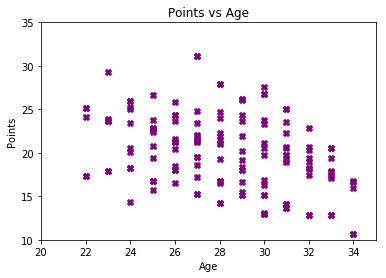

In [279]:
df = df.loc[(df['Age'] >= 22) & (df['Age'] <= 34)]

ages = df['Age']
points = df['PTS']
rebounds = df['TRB']
assists = df['AST']
field_goal_percentage = df['FG%']

plt.figure(figsize=(6,4))

plt.scatter(ages, points, color='purple', marker='X')

plt.xlabel('Age')
plt.ylabel('Points')
plt.title('Points vs Age')
plt.axis([20, 35, 10, 35])

plt.savefig('Points versus Age.jpg')

plt.show()

#Declaraing x and y variables needed for analyses
#Creating a figure
#Plotting points over the course of a player's career
#Scatter plot makes the most sense here as it is effectively time series data
#Setting up parameter for the graph
#Saving image of plot

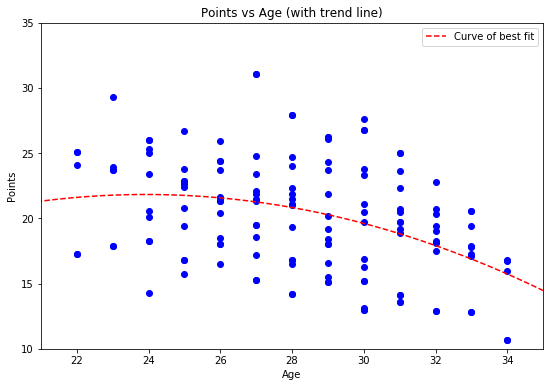

Quadratic function of best fit is: -0.06000303684132346x^2 + 2.8707483172810204x - 12.508017213008786


In [281]:
%matplotlib inline

plt.figure(figsize=(9,6))
x = np.linspace(20, 35, 200)

lobf_pts = np.polyfit(ages, points, 2)
plt.plot(x, np.polyval(lobf_pts, x), color='red',  linestyle='--')

plt.scatter(ages, points, color='blue', marker='o')

plt.xlabel('Age')
plt.ylabel('Points')
plt.title('Points vs Age (with trend line)')
plt.axis([21, 35, 10, 35])
plt.legend(['Curve of best fit'])

plt.savefig('Points versus Age with trend line.png')

plt.show()


print('Quadratic function of best fit is: ' + str(lobf_pts[0]) + 'x^2 + ' + str(lobf_pts[1]) + 'x - ' + str(lobf_pts[2]*-1))

#Creating and plotting a line of best fit for the relationship between points and age
#Using a quadratic as I expect the data to follow somewhat of a bell curve
#Using 'inline' magic function to plot the line of best fit over the scatter plot
#Adding a legend to idnetify the regression line

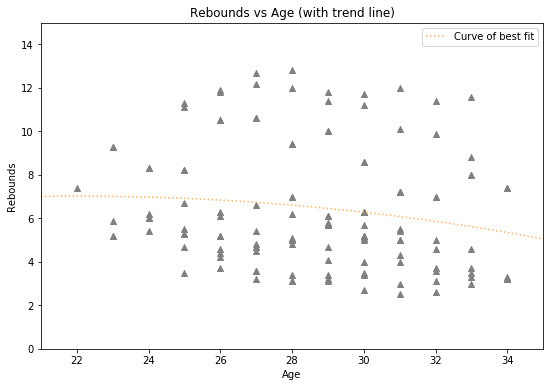

Quadratic function of best fit is: -0.011731014235646575x^2 + 0.5178048659214186x + 1.3062924935212878


In [264]:
%matplotlib inline

plt.figure(figsize=(9,6))

lobf_reb = np.polyfit(ages, rebounds, 2)
plt.plot(x, np.polyval(lobf_reb, x), color='#FFB266', linestyle=':')

plt.scatter(ages, rebounds, color='#808080', marker='^')

plt.xlabel('Age')
plt.ylabel('Rebounds')
plt.title('Rebounds vs Age (with trend line)')
plt.legend(['Curve of best fit'])
plt.axis([21, 35, 0, 15])
plt.savefig('Rebounds versus Age with trend line.png')

plt.show()

print('Quadratic function of best fit is: ' + str(lobf_reb[0]) + 'x^2 + ' + str(lobf_reb[1]) + 'x + ' + str(lobf_reb[2]))

#Plotting Rebounds versus Age
#No real relationship seen here, independent of linear, quadratic, cubic, etc regression

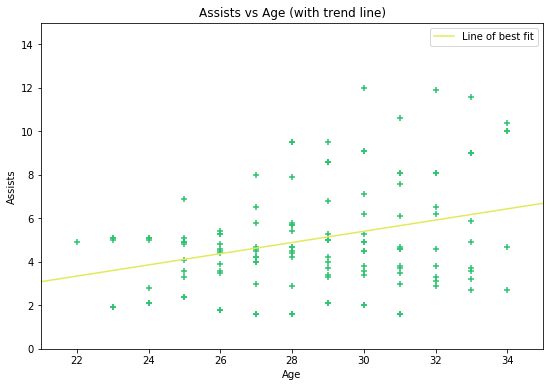

Line of best fit is: y = 0.2576733688961839x - 2.3249610176446485
R^2 value is: 0.0980479853783986


In [259]:
%matplotlib inline

plt.figure(figsize=(9,6))

lobf_ast = np.polyfit(ages, assists, 1)
plt.plot(x, np.polyval(lobf_ast, x), color='#E4E95B', linestyle='-')

plt.scatter(ages, assists, color='#2BC46D', marker='+')

plt.xlabel('Age')
plt.ylabel('Assists')
plt.title('Assists vs Age (with trend line)')
plt.legend(['Line of best fit'])
plt.axis([21, 35, 0, 15])
plt.savefig('Assists versus Age with trend line.png')

plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(ages, assists)
print('Line of best fit is: y = ' + str(slope) + 'x - ' + str(intercept*-1))
print('R^2 value is: ' + str(r_value**2))

#Plotting Assists versus Age
#No real relationship seen here, independent of linear, quadratic, cubic, etc. regression

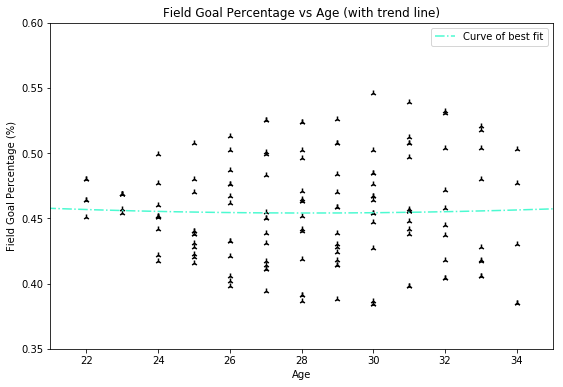

Quadratic function of best fit is: 6.919028612235506e-05x^2 - 0.0039031824031822804x + 0.5091251858863106


In [283]:
%matplotlib inline

plt.figure(figsize=(9,6))

lobf_fgp = np.polyfit(ages, field_goal_percentage, 2)
plt.plot(x, np.polyval(lobf_fgp, x), color='#4BFAD1', linestyle='-.')

plt.scatter(ages, field_goal_percentage, color='#000000', marker='2')

plt.xlabel('Age')
plt.ylabel('Field Goal Percentage (%)')
plt.title('Field Goal Percentage vs Age (with trend line)')
plt.legend(['Curve of best fit'])
plt.axis([21, 35, 0.35, 0.60])
plt.savefig('Field Goal Percentage versus Age with trend line.png')

plt.show()

print('Quadratic function of best fit is: ' + str(lobf_fgp[0]) + 'x^2 - ' + str(lobf_fgp[1]*-1) + 'x + ' + str(lobf_fgp[2]))

#Plotting FG% versus Age
#No real relationship seen here, independent of linear, quadratic, cubic, etc. regression